# jak używać:

##### function Lagrange(n, f, a, b, vec=eq_nodes(n, a, b))
    n     - ilość węzłów, 
    f     - funkcja do interpolowania
    [a,b] - przedział do interpolacji
    vec   - lista węzłów (domyślnie równoodległe)
zwraca funkcję poly(x), która dla danej wartości x zwraca wartość wielomianu interpolacyjnego Lagrang'a

##### function Baricentric_Lagrange(n, f, a, b , vec=eq_nodes(n, a, b), ch=false)
    n     - ilość węzłów, 
    f     - funkcja do interpolowania
    [a,b] - przedział do interpolacji
    vec   - lista węzłów (domyślnie równoodległe)
    ch    - jeśli węzły Chebyszewa, używa wzoru
zwraca funkcję poly(x), która dla danej wartości x zwraca wartość wielomianu interpolacyjnego Lagrang'a w formie barycentrycznej    

##### function Werner_Lagrange(n, f, a, b, vec=eq_nodes(n, a, b))
     --- || ---
zwraca funkcję poly(x), która dla danej wartości x zwraca wartość wielomianu interpolacyjnego Lagrang'a w formie barycentrycznej, gdzie waga barycentryczna jest oblicznona algorytmem Wernera

##### function eq_nodes(n, a, b)
    n     - ilość węzłów
    [a,b] - predział
zwraca węzły równoodległe na zadanym przedziale

##### function ch_nodes(n, a, b)
    n     - ilość węzłów
    [a,b] - predział
zwraca węzły Chebyszewa na zadanym przedziale

##### function rd_nodes(n, a, b)
    n     - ilość węzłów
    [a,b] - predział
zwraca losowo utworzone węzły, posortowane rosnąco

##### function max_error(f, L, a, b)
    f     - funkcja interpolowana
    L     - wielomian interpolujący
    [a,b] - przedział interpolacji
zwraca największą różnicę (błąd) absolutną w wartościach funkcji, a wielomianu który ją interpoluje

In [123]:
include("../prog/program.jl")


max_error (generic function with 1 method)

In [3]:
using Plots
pyplot()

Plots.PyPlotBackend()

lagrange max error: 8.655373e+09
bericentric max error: 7.562075e+09
Werner max error: 3.743910e+05



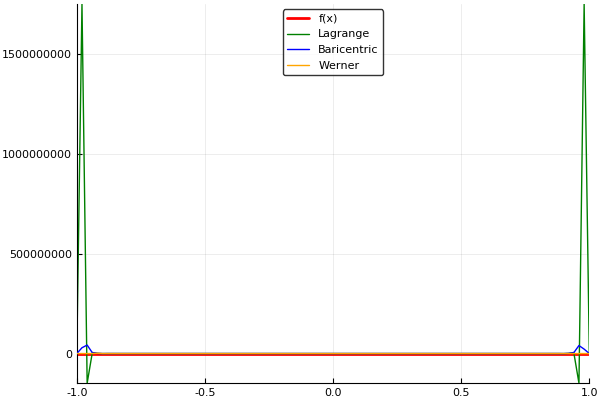

In [452]:
f(x) = (1 + 25*(x^2))^(-1)
a = -1; b = 1; n = 70
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b),true)
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd = rd_nodes(n, a, b)
rd1 = Lagrange(n, f, a, b, rd)
rd2 = Baricentric_Lagrange(n, f, a, b, rd)
rd3 = Werner_Lagrange(n, f, a, b, rd)

@printf("lagrange max error: %e\n", max_error(f, p1, a, b))
@printf("bericentric max error: %e\n", max_error(f, p2, a, b))
@printf("Werner max error: %e\n", max_error(f, p3, a, b))
x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot!(x, y, color="green", label="Lagrange")
y = p2.(x)
plot!(x, y, color="blue", label="Baricentric")
y = p3.(x)
plot!(x, y, color="orange", label="Werner")



lagrange max error: 2.380647e+06
bericentric max error: 2.382197e+06
Werner max error: 2.905441e+06



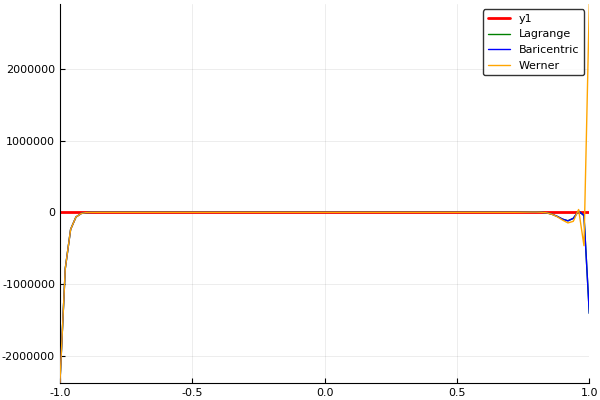

In [235]:
@printf("lagrange max error: %e\n", max_error(f, rd1, a, b))
@printf("bericentric max error: %e\n", max_error(f, rd2, a, b))
@printf("Werner max error: %e\n", max_error(f, rd3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = rd1.(x)
plot!(x, y, color="green", label="Lagrange")
y = rd2.(x)
plot!(x, y, color="blue", label="Baricentric")
y = rd3.(x)
plot!(x, y, color="orange", label="Werner")


lagrange max error: 1.788379e+03
bericentric max error: 2.553513e-15
Werner max error: 0.000000e+00



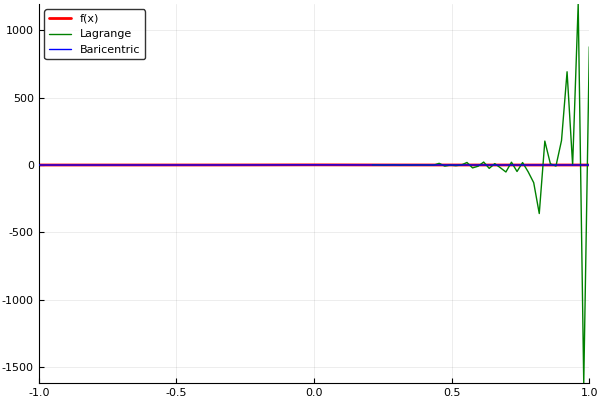

In [420]:
@printf("lagrange max error: %e\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %e\n", max_error(f, ch2, a, b))
@printf("Werner max error: %e\n", max_error(f, ch3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = ch1.(x)
plot!(x, y, color="green", label="Lagrange")
y = ch2.(x)
plot!(x, y, color="blue", label="Baricentric")
#y = ch3.(x)
#plot!(x, y, color="orange", label="Werner")



In [440]:
f(x) = atan(x)
a = -1; b = 1; n = 800
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %e\n", max_error(f, p1, a, b))
@printf("bericentric max error: %e\n", max_error(f, p2, a, b))
@printf("Werner max error: %e\n", max_error(f, p3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot!(x, y, color="green", label="Lagrange")
y = p2.(x)
plot!(x, y, color="blue", label="Baricentric")
y = p3.(x)
plot!(x, y, color="orange", label="Werner")


lagrange max error: 7.878111e+155
bericentric max error: 0.000000e+00
Werner max error: 0.000000e+00


ArgumentError: [91mArgumentError: At least one finite value must be provided to formatter.[39m

lagrange max error: 5.812047e-03
bericentric max error: 3.327019e-02
Werner max error: 1.702814e-03



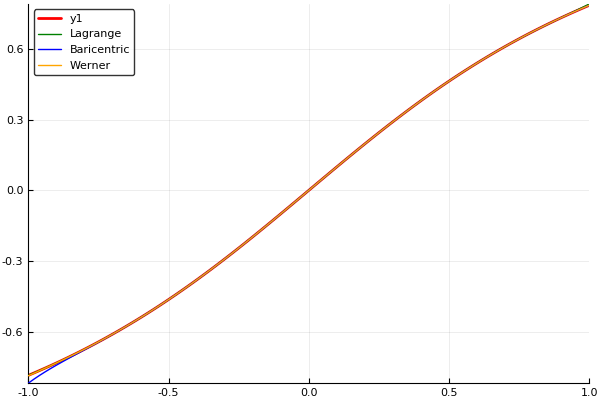

In [403]:
@printf("lagrange max error: %e\n", max_error(f, rd1, a, b))
@printf("bericentric max error: %e\n", max_error(f, rd2, a, b))
@printf("Werner max error: %e\n", max_error(f, rd3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = rd1.(x)
plot!(x, y, color="green", label="Lagrange")
y = rd2.(x)
plot!(x, y, color="blue", label="Baricentric")
y = rd3.(x)
plot!(x, y, color="orange", label="Werner")


lagrange max error: 1.398002e+03
bericentric max error: 3.387095e-08
Werner max error: 0.000000e+00



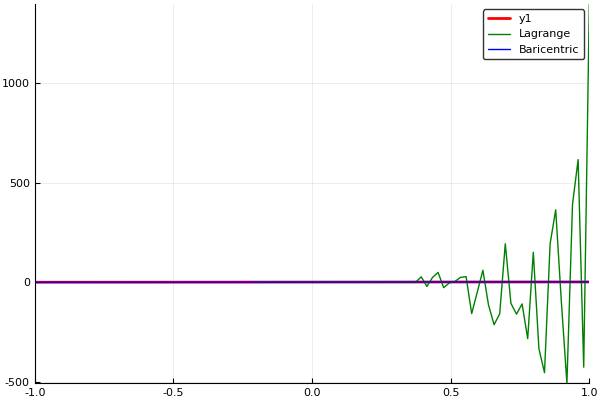

In [441]:
@printf("lagrange max error: %e\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %e\n", max_error(f, ch2, a, b))
@printf("Werner max error: %e\n", max_error(f, ch3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = ch1.(x)
plot!(x, y, color="green", label="Lagrange")
y = ch2.(x)
plot!(x, y, color="blue", label="Baricentric")
#y = ch3.(x)
#plot!(x, y, color="orange", label="Werner")



In [447]:
f(x) = maximum([0.0, 1-4x])
a = -5; b = 5; n = 700
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %e\n", max_error(f, p1, a, b))
@printf("bericentric max error: %e\n", max_error(f, p2, a, b))
@printf("Werner max error: %e\n", max_error(f, p3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot!(x, y, color="green", label="L(x)")
y = p2.(x)
plot!(x, y, color="blue", label="B(x)")
y = p3.(x)
plot!(x, y, color="orange", label="W(x)")

lagrange max error: 3.159673e+200
bericentric max error: 1.380476e+11
Werner max error: 0.000000e+00


ArgumentError: [91mArgumentError: At least one finite value must be provided to formatter.[39m

lagrange max error: 2.360515
bericentric max error: 1366.436785
Werner max error: 24.801320



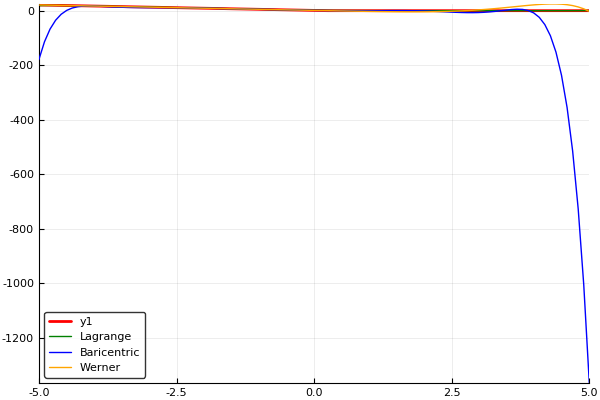

In [284]:
@printf("lagrange max error: %f\n", max_error(f, rd1, a, b))
@printf("bericentric max error: %f\n", max_error(f, rd2, a, b))
@printf("Werner max error: %f\n", max_error(f, rd3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = rd1.(x)
plot!(x, y, color="green", label="Lagrange")
y = rd2.(x)
plot!(x, y, color="blue", label="Baricentric")
y = rd3.(x)
plot!(x, y, color="orange", label="Werner")


lagrange max error: 6.744000e+04
bericentric max error: 7.081382e+00
Werner max error: 0.000000e+00



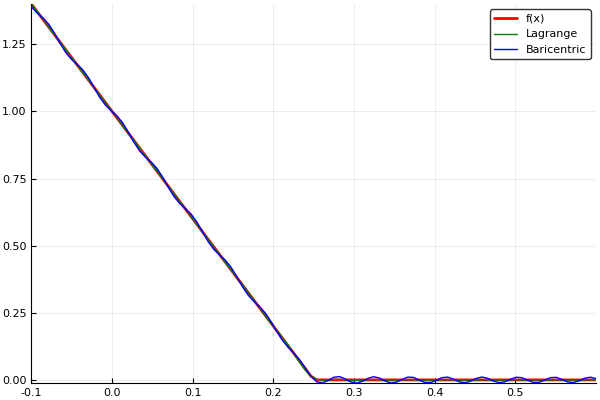

In [448]:
@printf("lagrange max error: %e\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %e\n", max_error(f, ch2, a, b))
@printf("Werner max error: %e\n", max_error(f, ch3, a, b))

x = linspace(-0.1,0.6, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = ch1.(x)
plot!(x, y, color="green", label="Lagrange")
y = ch2.(x)
plot!(x, y, color="blue", label="Baricentric")
#y = ch3.(x)
#plot!(x, y, color="orange", label="Werner")



lagrange max error: 17075519975189170.000000
bericentric max error: 109950147448193056.000000
Werner max error: 2276667426922621.000000



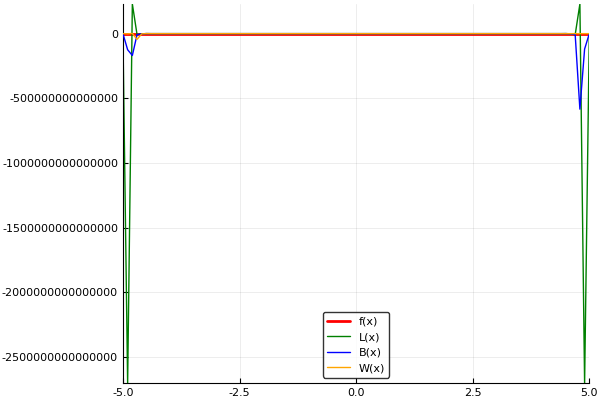

In [135]:
f(x) = abs(x)
a = -5; b = 5; n = 70
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %f\n", max_error(f, p1, a, b))
@printf("bericentric max error: %f\n", max_error(f, p2, a, b))
@printf("Werner max error: %f\n", max_error(f, p3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot!(x, y, color="green", label="L(x)")
y = p2.(x)
plot!(x, y, color="blue", label="B(x)")
y = p3.(x)
plot!(x, y, color="orange", label="W(x)")

lagrange max error: 22729536414617912526379482611712.000000
bericentric max error: 99887201815.707642
Werner max error: 539449605680.857666



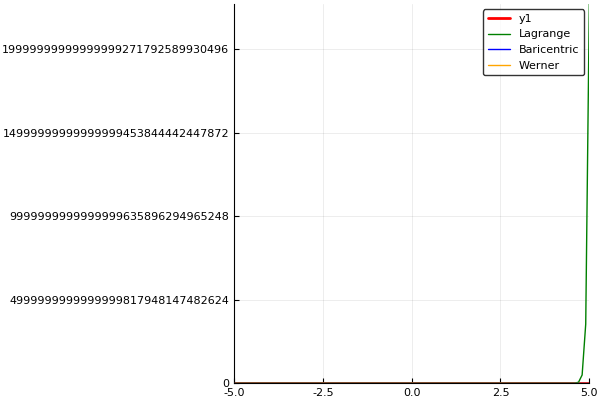

In [136]:
@printf("lagrange max error: %f\n", max_error(f, rd1, a, b))
@printf("bericentric max error: %f\n", max_error(f, rd2, a, b))
@printf("Werner max error: %f\n", max_error(f, rd3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = rd1.(x)
plot!(x, y, color="green", label="Lagrange")
y = rd2.(x)
plot!(x, y, color="blue", label="Baricentric")
y = rd3.(x)
plot!(x, y, color="orange", label="Werner")


lagrange max error: 0.042042
bericentric max error: 0.042042
Werner max error: 139575.797778



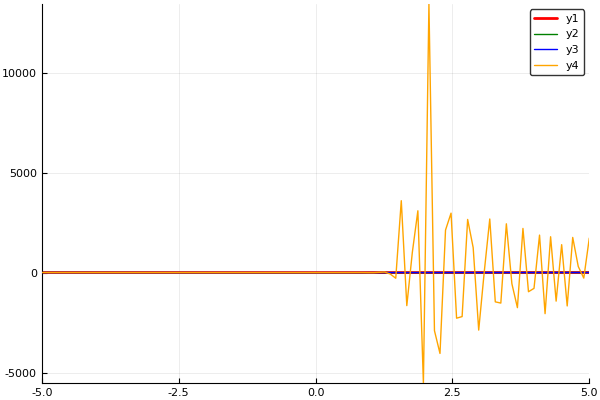

In [139]:
@printf("lagrange max error: %f\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %f\n", max_error(f, ch2, a, b))
@printf("Werner max error: %f\n", max_error(f, ch3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = ch1.(x)
plot!(x, y, color="green")
y = ch2.(x)
plot!(x, y, color="blue")
y = ch3.(x)
plot!(x, y, color="orange")


lagrange max error: 8.206343
bericentric max error: 8.206343
Werner max error: 8.206343



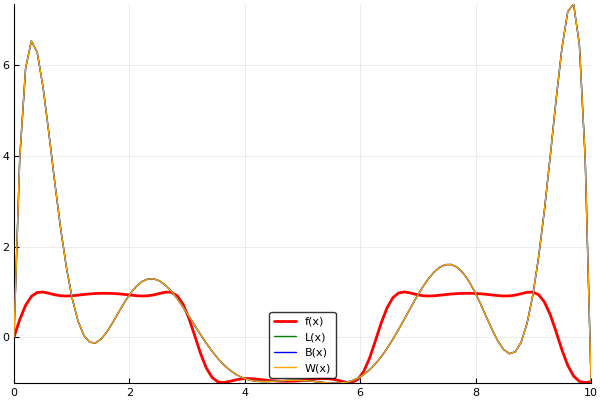

In [400]:
f(x) = sin(2*sin(2*sin(x)))
a = 0; b = 10; n = 10
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %f\n", max_error(f, p1, a, b))
@printf("bericentric max error: %f\n", max_error(f, p2, a, b))
@printf("Werner max error: %f\n", max_error(f, p3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot!(x, y, color="green", label="L(x)")
y = p2.(x)
plot!(x, y, color="blue", label="B(x)")
y = p3.(x)
plot!(x, y, color="orange", label="W(x)")

lagrange max error: 148252.953527
bericentric max error: 2.878469
Werner max error: 2186168.396713



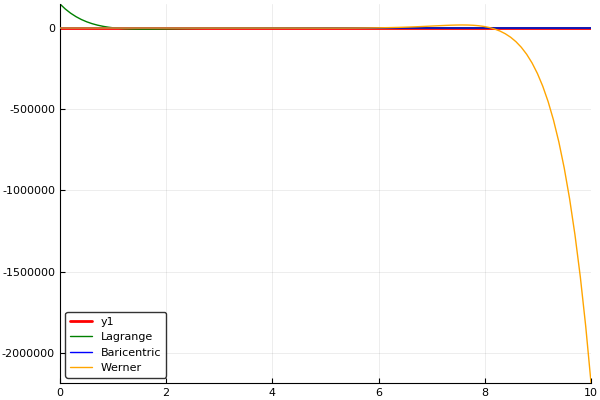

In [401]:
@printf("lagrange max error: %f\n", max_error(f, rd1, a, b))
@printf("bericentric max error: %f\n", max_error(f, rd2, a, b))
@printf("Werner max error: %f\n", max_error(f, rd3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = rd1.(x)
plot!(x, y, color="green", label="Lagrange")
y = rd2.(x)
plot!(x, y, color="blue", label="Baricentric")
y = rd3.(x)
plot!(x, y, color="orange", label="Werner")


lagrange max error: 0.000376
bericentric max error: 0.000376
Werner max error: 12071858.624939



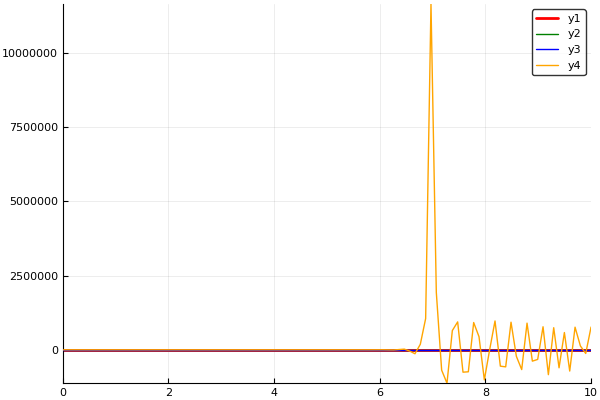

In [151]:
@printf("lagrange max error: %f\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %f\n", max_error(f, ch2, a, b))
@printf("Werner max error: %f\n", max_error(f, ch3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = ch1.(x)
plot!(x, y, color="green")
y = ch2.(x)
plot!(x, y, color="blue")
y = ch3.(x)
plot!(x, y, color="orange")


lagrange max error: 0.000000
bericentric max error: 0.000000
Werner max error: 0.000000



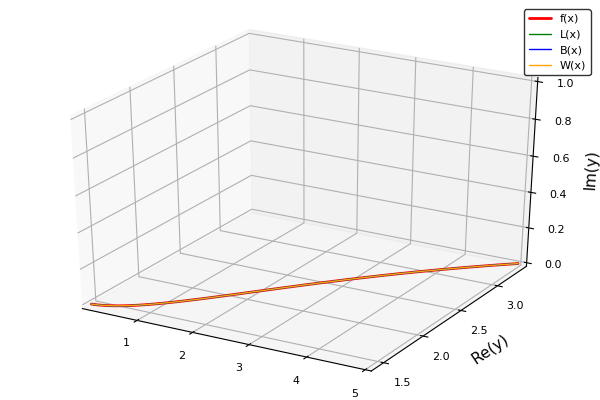

In [144]:
f(x) = log(complex(x^2 + 4))
a = 0.1; b = 5; n = 20
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %f\n", max_error(f, p1, a, b))
@printf("bericentric max error: %f\n", max_error(f, p2, a, b))
@printf("Werner max error: %f\n", max_error(f, p3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot!(x, y, color="green", label="L(x)")
y = p2.(x)
plot!(x, y, color="blue", label="B(x)")
y = p3.(x)
plot!(x, y, color="orange", label="W(x)")

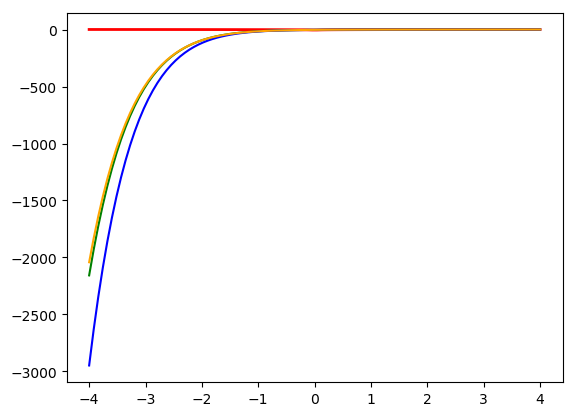

lagrange max error: 0.000301
bericentric max error: 0.000100
Werner max error: 0.000040


In [538]:
x = linspace(-4,4, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = rd1.(x)
plot(x, y, color="green")
y = rd2.(x)
plot(x, y, color="blue")
y = rd3.(x)
plot(x, y, color="orange")
@printf("lagrange max error: %f\n", max_error(f, rd1, a, b))
@printf("bericentric max error: %f\n", max_error(f, rd2, a, b))
@printf("Werner max error: %f\n", max_error(f, rd3, a, b))

lagrange max error: 0.000000
bericentric max error: 0.000000
Werner max error: 0.000000



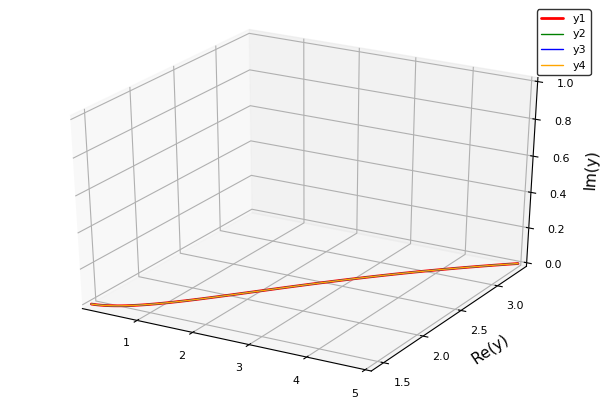

In [79]:
@printf("lagrange max error: %f\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %f\n", max_error(f, ch2, a, b))
@printf("Werner max error: %f\n", max_error(f, ch3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = ch1.(x)
plot!(x, y, color="green")
y = ch2.(x)
plot!(x, y, color="blue")
y = ch3.(x)
plot!(x, y, color="orange")


lagrange max error: 1009718181596012032.000000
bericentric max error: 6507459658542968832.000000
Werner max error: 6915349826254560256.000000



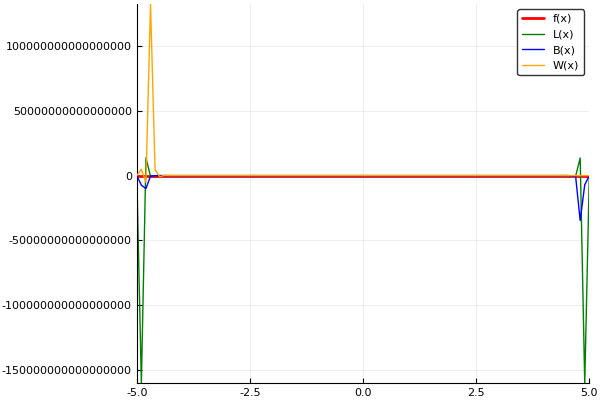

In [152]:
f(x) = sin(4*pi^2*x^2)
a = -5; b = 5; n = 70
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %f\n", max_error(f, p1, a, b))
@printf("bericentric max error: %f\n", max_error(f, p2, a, b))
@printf("Werner max error: %f\n", max_error(f, p3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot!(x, y, color="green", label="L(x)")
y = p2.(x)
plot!(x, y, color="blue", label="B(x)")
y = p3.(x)
plot!(x, y, color="orange", label="W(x)")

lagrange max error: 2.423869
bericentric max error: 2.423869
Werner max error: 3294857610110342.000000



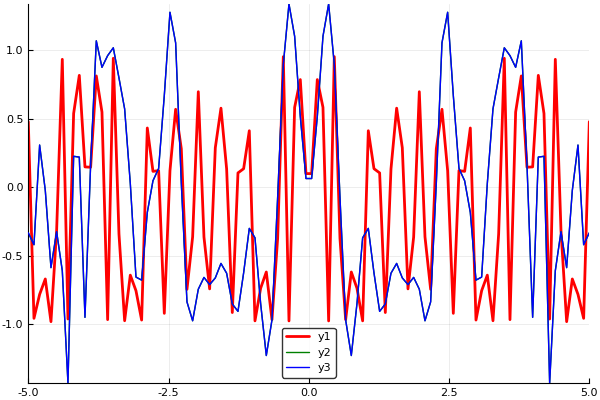

In [154]:
@printf("lagrange max error: %f\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %f\n", max_error(f, ch2, a, b))
@printf("Werner max error: %f\n", max_error(f, ch3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = ch1.(x)
plot!(x, y, color="green")
y = ch2.(x)
plot!(x, y, color="blue")
#y = ch3.(x)
#plot!(x, y, color="orange")


lagrange max error: 2675418560505291.500000
bericentric max error: 2345268214842560.500000
Werner max error: 107316649662.702728



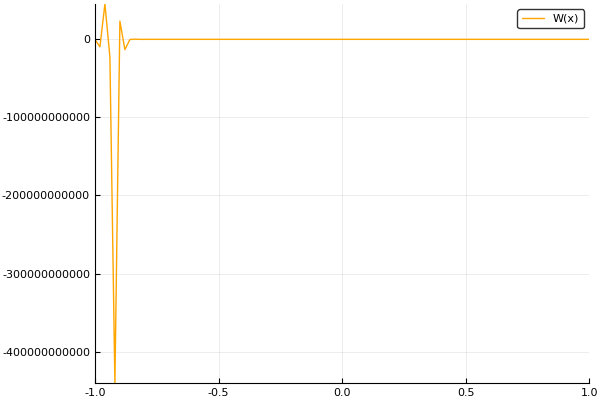

In [157]:
f(x) = abs(x) + x/2 - x^2
a = -1; b = 1; n = 100
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %f\n", max_error(f, p1, a, b))
@printf("bericentric max error: %f\n", max_error(f, p2, a, b))
@printf("Werner max error: %f\n", max_error(f, p3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot(x, y, color="green", label="L(x)")
y = p2.(x)
plot(x, y, color="blue", label="B(x)")
y = p3.(x)
plot(x, y, color="orange", label="W(x)")

lagrange max error: 0.008313
bericentric max error: 0.008313
Werner max error: 27355.879733



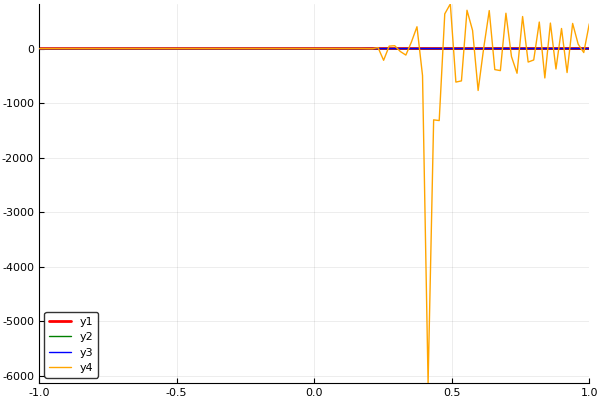

In [158]:
@printf("lagrange max error: %f\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %f\n", max_error(f, ch2, a, b))
@printf("Werner max error: %f\n", max_error(f, ch3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = ch1.(x)
plot!(x, y, color="green")
y = ch2.(x)
plot!(x, y, color="blue")
y = ch3.(x)
plot!(x, y, color="orange")


In [434]:
f(x) = (x - 3)*(x - 2)^2*(x - 1)*x*(x+4)
a = -5; b = 5; n = 500
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %e\n", max_error(f, p1, a, b))
@printf("bericentric max error: %e\n", max_error(f, p2, a, b))
@printf("Werner max error: %e\n", max_error(f, p3, a, b))

x = linspace(a,-4, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot!(x, y, color="green", label="Lagrange")
y = p2.(x)
plot!(x, y, color="blue", label="Barycentyczny")
y = p3.(x)
plot!(x, y, color="orange", label="Werner")

lagrange max error: 8.287844e+131
bericentric max error: 1.154819e+04
Werner max error: 5.153982e+06


ArgumentError: [91mArgumentError: At least one finite value must be provided to formatter.[39m

lagrange max error: 8.913173e+09
bericentric max error: 1.128648e+05
Werner max error: 2.166442e+04



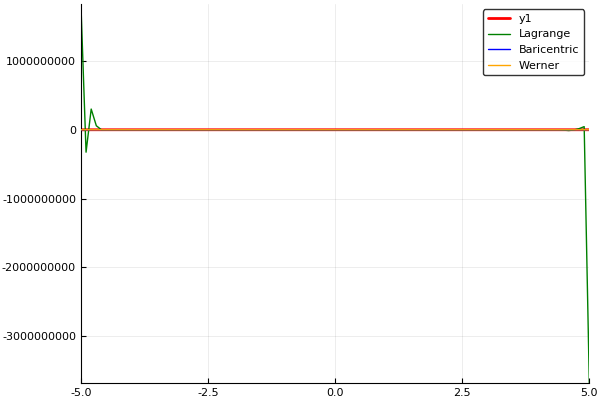

In [211]:
@printf("lagrange max error: %e\n", max_error(f, rd1, a, b))
@printf("bericentric max error: %e\n", max_error(f, rd2, a, b))
@printf("Werner max error: %e\n", max_error(f, rd3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = rd1.(x)
plot!(x, y, color="green", label="Lagrange")
y = rd2.(x)
plot!(x, y, color="blue", label="Baricentric")
y = rd3.(x)
plot!(x, y, color="orange", label="Werner")


lagrange max error: 5.275069e-11
bericentric max error: 9.094947e-12
Werner max error: Inf



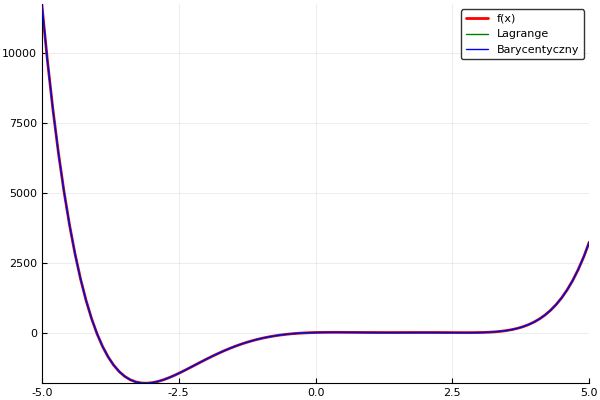

In [435]:
@printf("lagrange max error: %e\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %e\n", max_error(f, ch2, a, b))
@printf("Werner max error: %e\n", max_error(f, ch3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = ch1.(x)
plot!(x, y, color="green", label="Lagrange")
y = ch2.(x)
plot!(x, y, color="blue", label="Barycentyczny")
#y = ch3.(x)
#plot!(x, y, color="orange", label="Werner")


lagrange max error: 2.927545e+08
bericentric max error: 2.927546e+08
Werner max error: 2.927545e+08



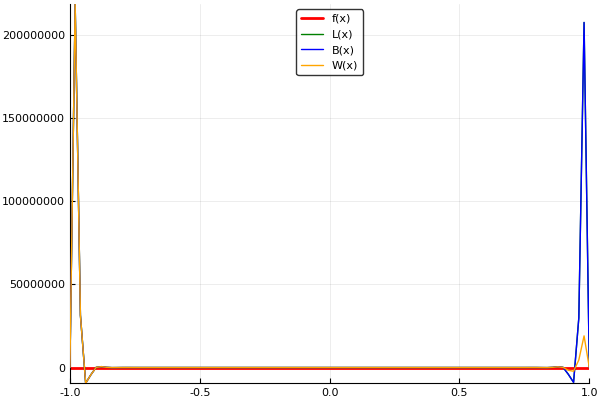

In [329]:
f(x) = x - floor(x)
a = -1; b = 1; n = 40
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %e\n", max_error(f, p1, a, b))
@printf("bericentric max error: %e\n", max_error(f, p2, a, b))
@printf("Werner max error: %e\n", max_error(f, p3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot!(x, y, color="green", label="L(x)")
y = p2.(x)
plot!(x, y, color="blue", label="B(x)")
y = p3.(x)
plot!(x, y, color="orange", label="W(x)")

lagrange max error: 4.728531e+05
bericentric max error: 6.017475e+02
Werner max error: 1.421934e+08



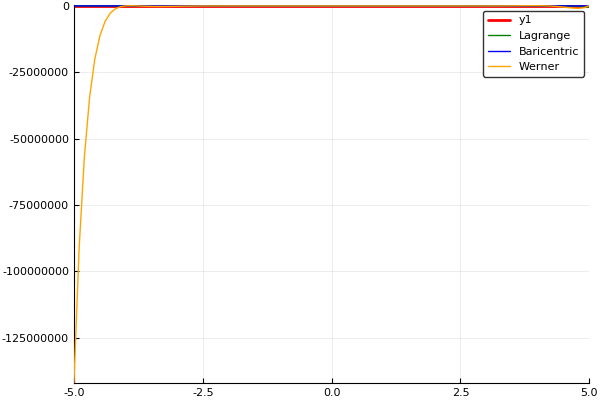

In [325]:
@printf("lagrange max error: %e\n", max_error(f, rd1, a, b))
@printf("bericentric max error: %e\n", max_error(f, rd2, a, b))
@printf("Werner max error: %e\n", max_error(f, rd3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = rd1.(x)
plot!(x, y, color="green", label="Lagrange")
y = rd2.(x)
plot!(x, y, color="blue", label="Baricentric")
y = rd3.(x)
plot!(x, y, color="orange", label="Werner")



lagrange max error: 9.882716e-01
bericentric max error: 9.882716e-01
Werner max error: 9.882706e-01



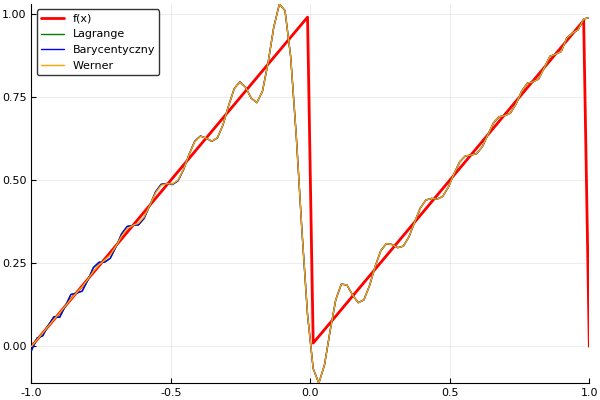

In [330]:
@printf("lagrange max error: %e\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %e\n", max_error(f, ch2, a, b))
@printf("Werner max error: %e\n", max_error(f, ch3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = ch1.(x)
plot!(x, y, color="green", label="Lagrange")
y = ch2.(x)
plot!(x, y, color="blue", label="Barycentyczny")
y = ch3.(x)
plot!(x, y, color="orange", label="Werner")


In [405]:
l = zeros(7)
d = zeros(7)
w = zeros(7)
rd1;rd2;rd3
f(x) = maximum([0.0, 1-4x])
a = -1; b = 1; n = 10
for i in 1:6
    for j in 1:100
        rd1 = Lagrange(n*i, f, a, b, rd_nodes(n*i, a, b))
        rd2 = Baricentric_Lagrange(n*i, f, a, b, rd_nodes(n*i, a, b))
        rd3 = Werner_Lagrange(n*i, f, a, b, rd_nodes(n*i, a, b))  
        l[i] += max_error(f, rd1, a, b)
        d[i] += max_error(f, rd2, a, b)
        w[i] += max_error(f, rd3, a, b)
    end
    l[i] /= 100.0
    d[i] /= 100.0
    w[i] /= 100.0
    @printf("n = %d, error: %e\n", i*n, l[i])
    @printf("n = %d, error: %e\n", i*n, d[i])
    @printf("n = %d, error: %e\n", i*n, w[i])
end


n = 10, error: 4.067576e+04
n = 10, error: 4.599860e+02
n = 10, error: 9.084679e+03
n = 20, error: 1.571614e+09
n = 20, error: 2.234794e+08
n = 20, error: 5.852737e+09
n = 30, error: 4.316782e+12
n = 30, error: 2.690538e+10
n = 30, error: 1.851588e+11
n = 40, error: 9.375044e+16
n = 40, error: 5.966214e+12
n = 40, error: 4.138494e+12
n = 50, error: 4.319420e+18
n = 50, error: 2.878791e+12
n = 50, error: 5.888468e+14
n = 60, error: 3.417257e+26
n = 60, error: 2.137335e+13
n = 60, error: 2.114029e+14


In [371]:
n = 10, error: 8.771170e-05
n = 10, error: 8.908967e-05
n = 10, error: 2.160841e-04

n = 20, error: 4.666647e+01
n = 20, error: 1.069877e+01
n = 20, error: 1.972002e+02


n = 30, error: 6.598764e+06
n = 30, error: 2.612693e+04
n = 30, error: 4.464225e+05

n = 40, error: 1.246748e+09
n = 40, error: 3.902486e+05
n = 40, error: 5.540198e+05

n = 50, error: 1.829421e+14
n = 50, error: 3.298779e+05
n = 50, error: 5.864775e+06

n = 60, error: 1.000159e+21
n = 60, error: 1.454239e+05
n = 60, error: 1.000000e+22

n = 10, error: 1.902661e-02
n = 10, error: 2.994479e-02
n = 10, error: 2.868768e-02
n = 20, error: 3.157558e-03
n = 20, error: 1.562761e-01
n = 20, error: 3.946537e-03
n = 30, error: 3.510107e+03
n = 30, error: 9.986593e-01
n = 30, error: 9.461990e-01
n = 40, error: 3.269488e+09
n = 40, error: 2.340491e+02
n = 40, error: 1.662497e+01
n = 50, error: 4.771246e+10
n = 50, error: 8.981975e+00
n = 50, error: 3.151374e+01
n = 60, error: 7.436034e+20
n = 60, error: 9.000289e+00
n = 60, error: 9.938603e+02

n = 10, error: 4.067576e+04
n = 10, error: 4.599860e+02
n = 10, error: 9.084679e+03
n = 20, error: 1.571614e+09
n = 20, error: 2.234794e+08
n = 20, error: 5.852737e+09
n = 30, error: 4.316782e+12
n = 30, error: 2.690538e+10
n = 30, error: 1.851588e+11
n = 40, error: 9.375044e+16
n = 40, error: 5.966214e+12
n = 40, error: 4.138494e+12
n = 50, error: 4.319420e+18
n = 50, error: 2.878791e+12
n = 50, error: 5.888468e+14
n = 60, error: 3.417257e+26
n = 60, error: 2.137335e+13
n = 60, error: 2.114029e+14


1-element Array{Float64,1}:
 0.0

In [372]:
n += 0.213

1-element Array{Float64,1}:
 0.213

In [373]:
n != 231


true

In [377]:
n[1] += n[1] + 1000


1000.4259999999999

In [376]:
n

1-element Array{Float64,1}:
 0.213